# Objective:- Prediction task is to determine whether a person makes over 50K a year or less than that

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
census_df=pd.read_csv('census.csv')

# Finding insights of the dataset and what it consist of

In [3]:
census_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
census_df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Attribute Information

Age --> what is the age of a person

Work Class --> Which class do the person belongs to the question

fnlwgt --> final weight

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
--> A single cell estimate of the population 16+ for each state.
--> Controls for Hispanic Origin by age and sex.
--> Controls by Race, age and sex.

education --> what eductaion level does a person posses

marital-status --> what is the marital status of the person

Occupation --> what occupation does a person posses

Relationship --> Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

Race --> White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex --> gender of the person

capital.gain --> continuous.
    
capital.loss--> continuous.

hours.per.week--> continuous.
    
Native_country --> which country record it is

income --> what is the income of a person

In [5]:
#finding the numbers of rows and columns
census_df.shape

(32561, 15)

In [6]:
#finding the information about the data
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#finding what are the different work_class present in the dataset
print(census_df['workclass'].unique())
#finding number of values with a prticular work_class
print("\n")
print(census_df['workclass'].value_counts())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Unknown' ' Self-emp-inc' ' Without-pay' ' Never-worked']


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Unknown              1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [8]:
#finding what are the different education level in the dataset
print(census_df['education'].unique())
#finding number of values with a prticular education
print("\n")
print(census_df['education'].value_counts())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


In [9]:
#finding what are the different marital-status in the dataset
print(census_df['marital-status'].unique())
#finding number of values with a prticular marital-status
print("\n")
print(census_df['marital-status'].value_counts())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


In [10]:
#finding what are the different occupation in the dataset
print(census_df['occupation'].unique())
#finding number of values with a prticular occupation
print("\n")
print(census_df['occupation'].value_counts())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' Unknown'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Unknown              1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [11]:
#finding what are the different country in the dataset
print(census_df['native-country'].unique())
#finding number of values with a prticular country
print("\n")
print(census_df['native-country'].value_counts())

[' United-States' ' Cuba' ' Jamaica' ' India' ' Unknown' ' Mexico'
 ' South' ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany'
 ' Iran' ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia'
 ' Thailand' ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal'
 ' Dominican-Republic' ' El-Salvador' ' France' ' Guatemala' ' China'
 ' Japan' ' Yugoslavia' ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland'
 ' Trinadad&Tobago' ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland'
 ' Hungary' ' Holand-Netherlands']


 United-States                 29170
 Mexico                          643
 Unknown                         583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80

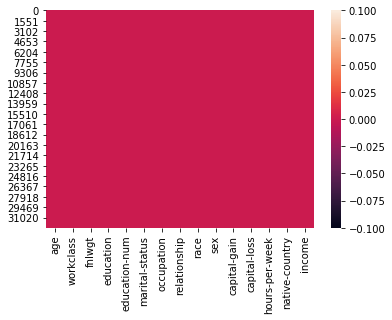

In [12]:
#Checking null values
sns.heatmap(census_df.isnull())

In [13]:
census_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# Bivariate Analysis

Text(0.5, 1.0, 'Income With respect  to age')

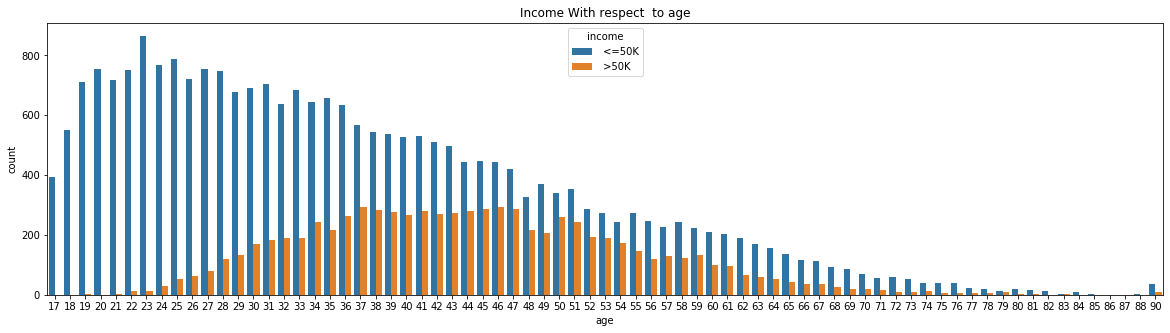

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(census_df['age'],hue=census_df['income'])
plt.title('Income With respect  to age')

In [15]:
#people with income more than 50k is less than that have income less than or equal to 50k

Text(0.5, 1.0, 'Income W.R.T Workclass')

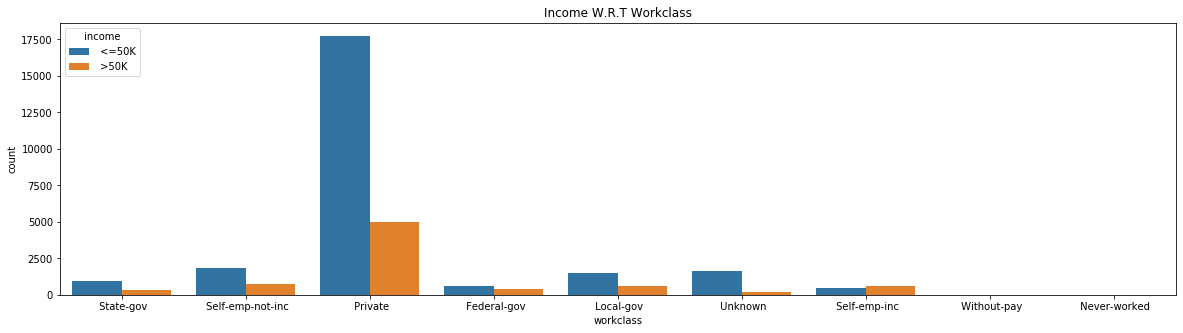

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(census_df['workclass'],hue=census_df['income'])
plt.title('Income W.R.T Workclass')

Text(0.5, 1.0, 'Income W.R.T education')

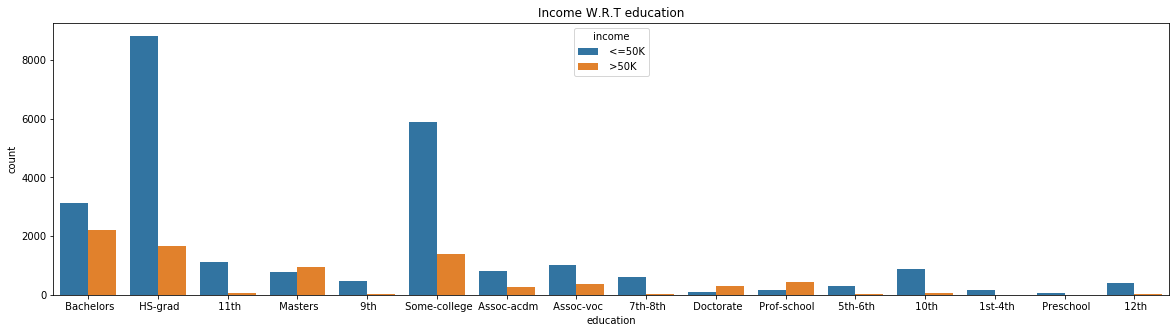

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(census_df['education'],hue=census_df['income'])
plt.title('Income W.R.T education')

Text(0.5, 1.0, 'Income W.R.T marital-status')

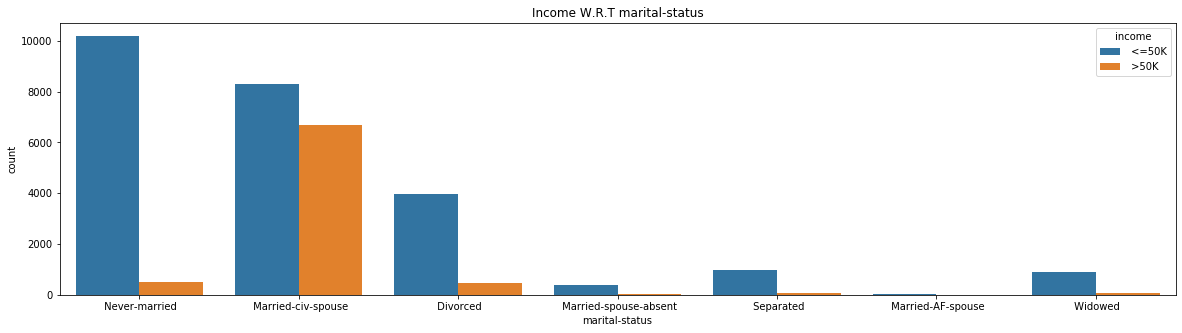

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(census_df['marital-status'],hue=census_df['income'])
plt.title('Income W.R.T marital-status')

Text(0.5, 1.0, 'Income W.R.T Occupation')

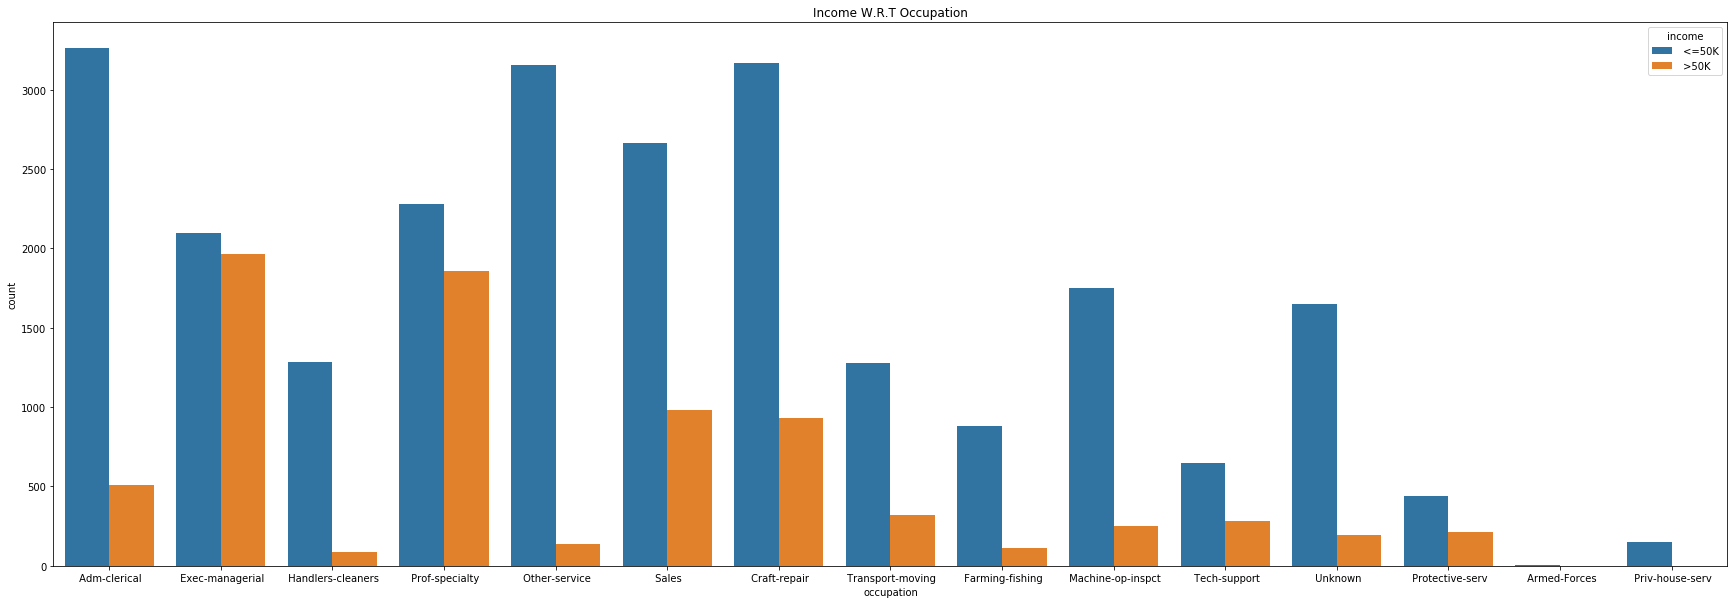

In [19]:
plt.figure(figsize=(30,10))
sns.countplot(census_df['occupation'],hue=census_df['income'])
plt.title('Income W.R.T Occupation')

Text(0.5, 1.0, 'Income W.R.T Race')

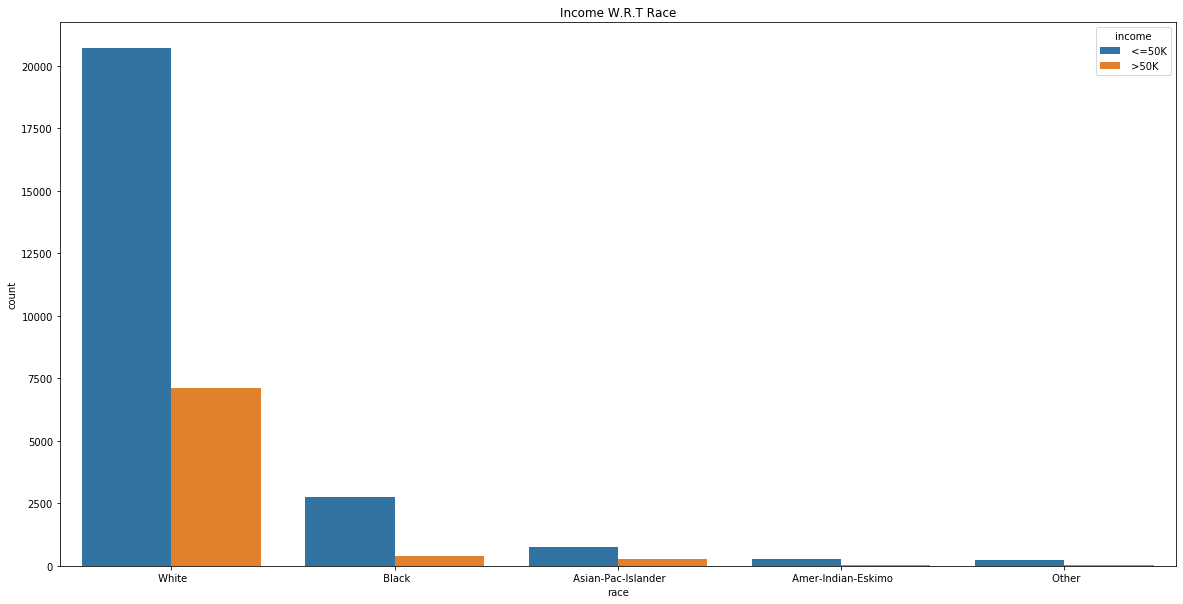

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(census_df['race'],hue=census_df['income'])
plt.title('Income W.R.T Race')

Text(0.5, 1.0, 'Income W.R.T Gender')

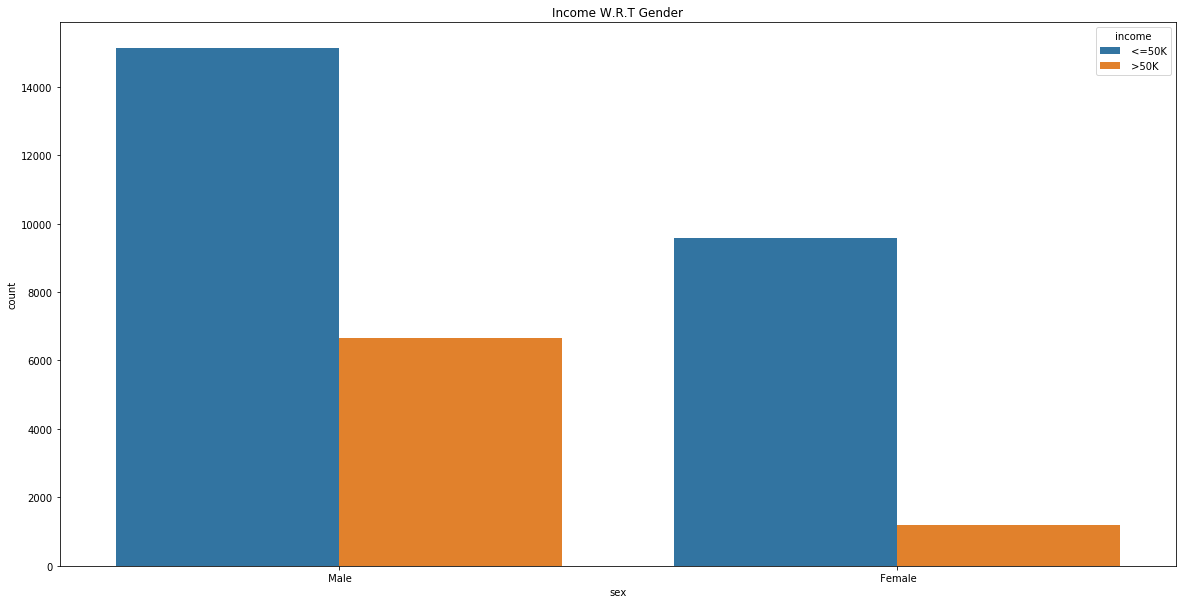

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(census_df['sex'],hue=census_df['income'])
plt.title('Income W.R.T Gender')

Text(0.5, 1.0, 'Capital Gain vs Capital Loss')

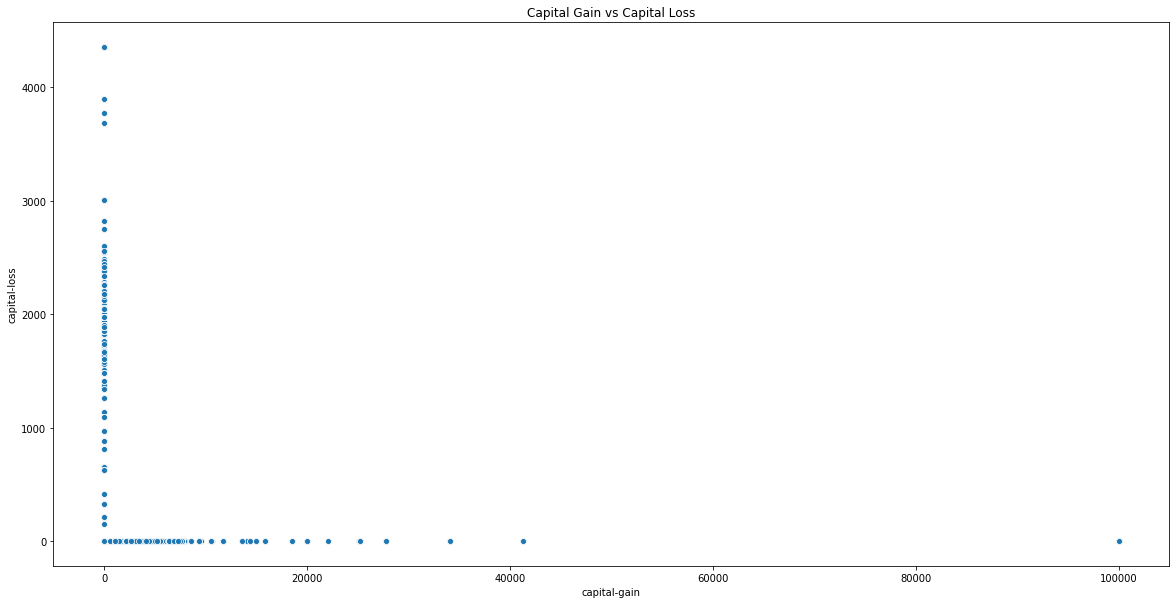

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(census_df['capital-gain'], census_df['capital-loss'])
plt.title('Capital Gain vs Capital Loss')

Text(0.5, 1.0, 'Income W.R.T Country')

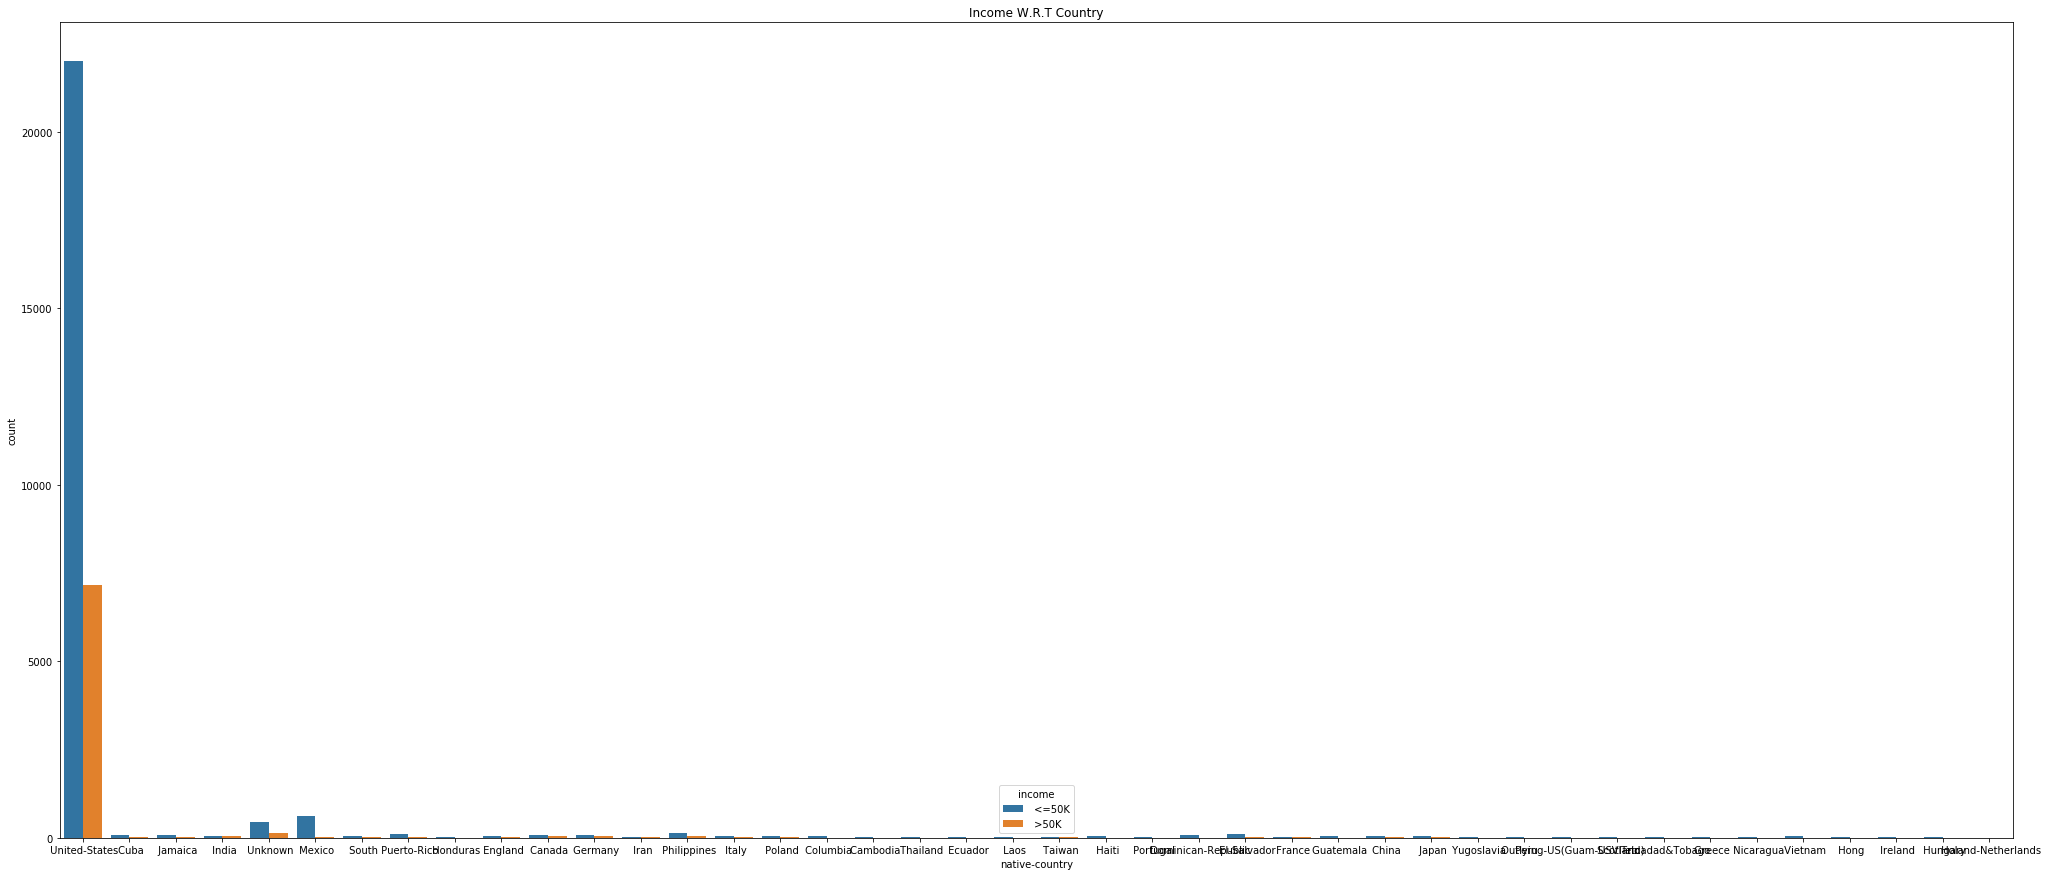

In [23]:
plt.figure(figsize=(35,15))
sns.countplot(census_df['native-country'],hue=census_df['income'])
plt.title('Income W.R.T Country')

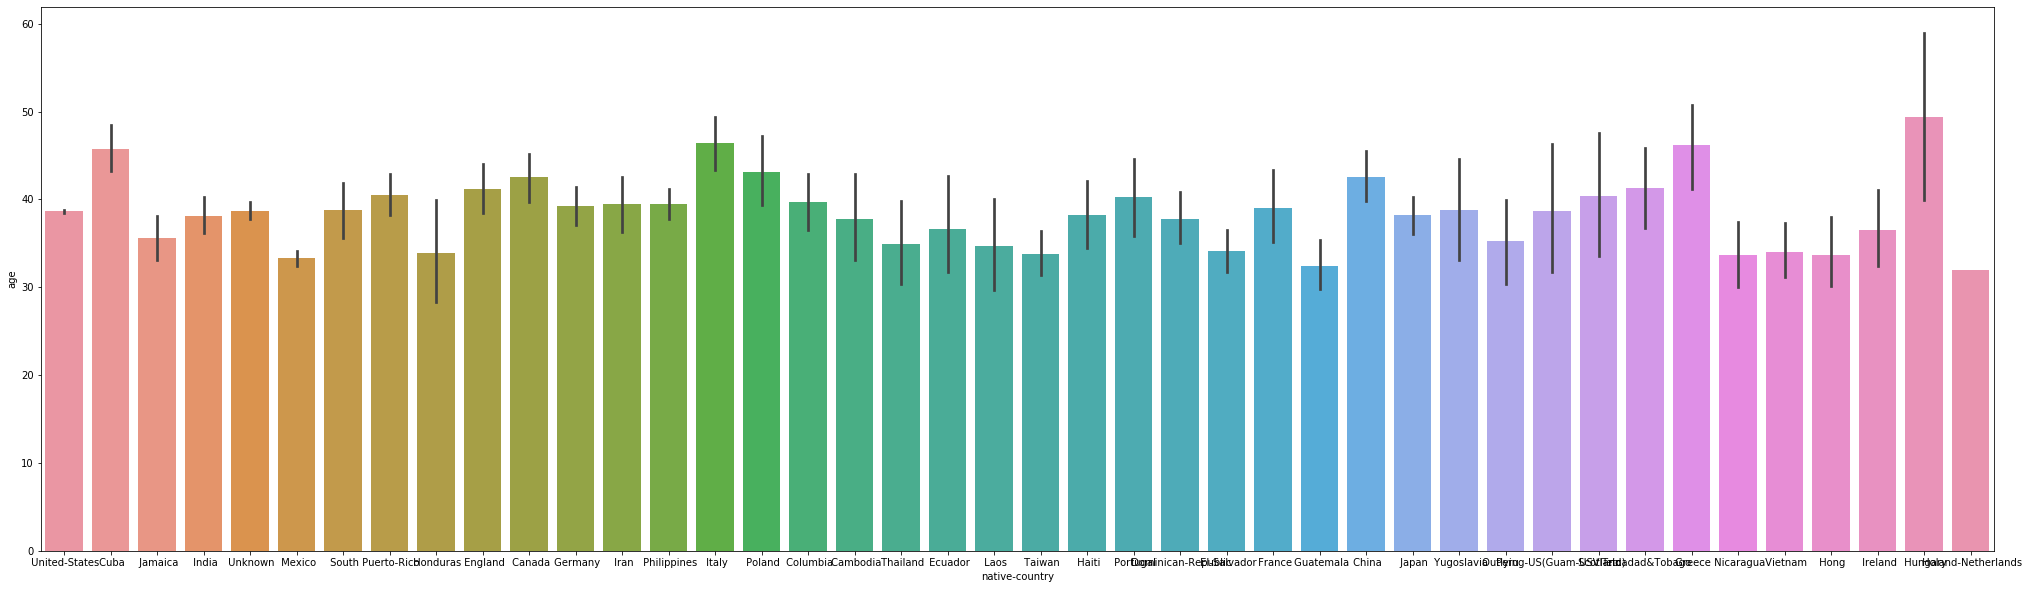

In [24]:
plt.figure(figsize=(35,10))
sns.barplot(census_df['native-country'],census_df['age'])

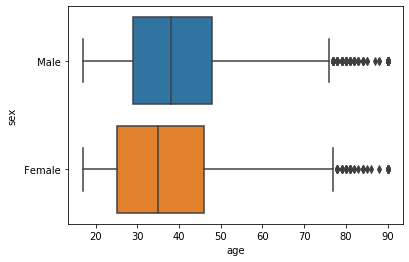

In [25]:
sns.boxplot(census_df['age'],census_df['sex'])

In [26]:
#teh IQR range of both male and female is almost same

In [27]:
#from this Bivariate analysis we can say that there less number of people who have the income more than that of 50k

the IQR range of people having income more than 50k is higher 

# Changing the categorical column 'values' to numeric 'values' using 'LABEL ENCODER'

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
lb=LabelEncoder()

In [30]:
census_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [31]:
columns=(lb.fit_transform(census_df['workclass']),lb.fit_transform(census_df['education']),lb.fit_transform(census_df['marital-status']),lb.fit_transform(census_df['occupation']),lb.fit_transform(census_df['relationship']),lb.fit_transform(census_df['race']),lb.fit_transform(census_df['sex']),lb.fit_transform(census_df['native-country']),lb.fit_transform(census_df['income']))

In [32]:
census_df['workclass']=columns[0]
census_df['education']=columns[1]
census_df['marital-status']=columns[2]
census_df['occupation']=columns[3]
census_df['relationship']=columns[4]
census_df['race']=columns[5]
census_df['sex']=columns[6]
census_df['native-country']=columns[7]
census_df['income']=columns[8]

In [33]:
census_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [34]:
#now that every column consists of a numeric value doing univariate analysis and dropping fnlwgt column 

In [35]:
census_df.drop(['fnlwgt'],axis=1,inplace= True)

# Univariate Analysis

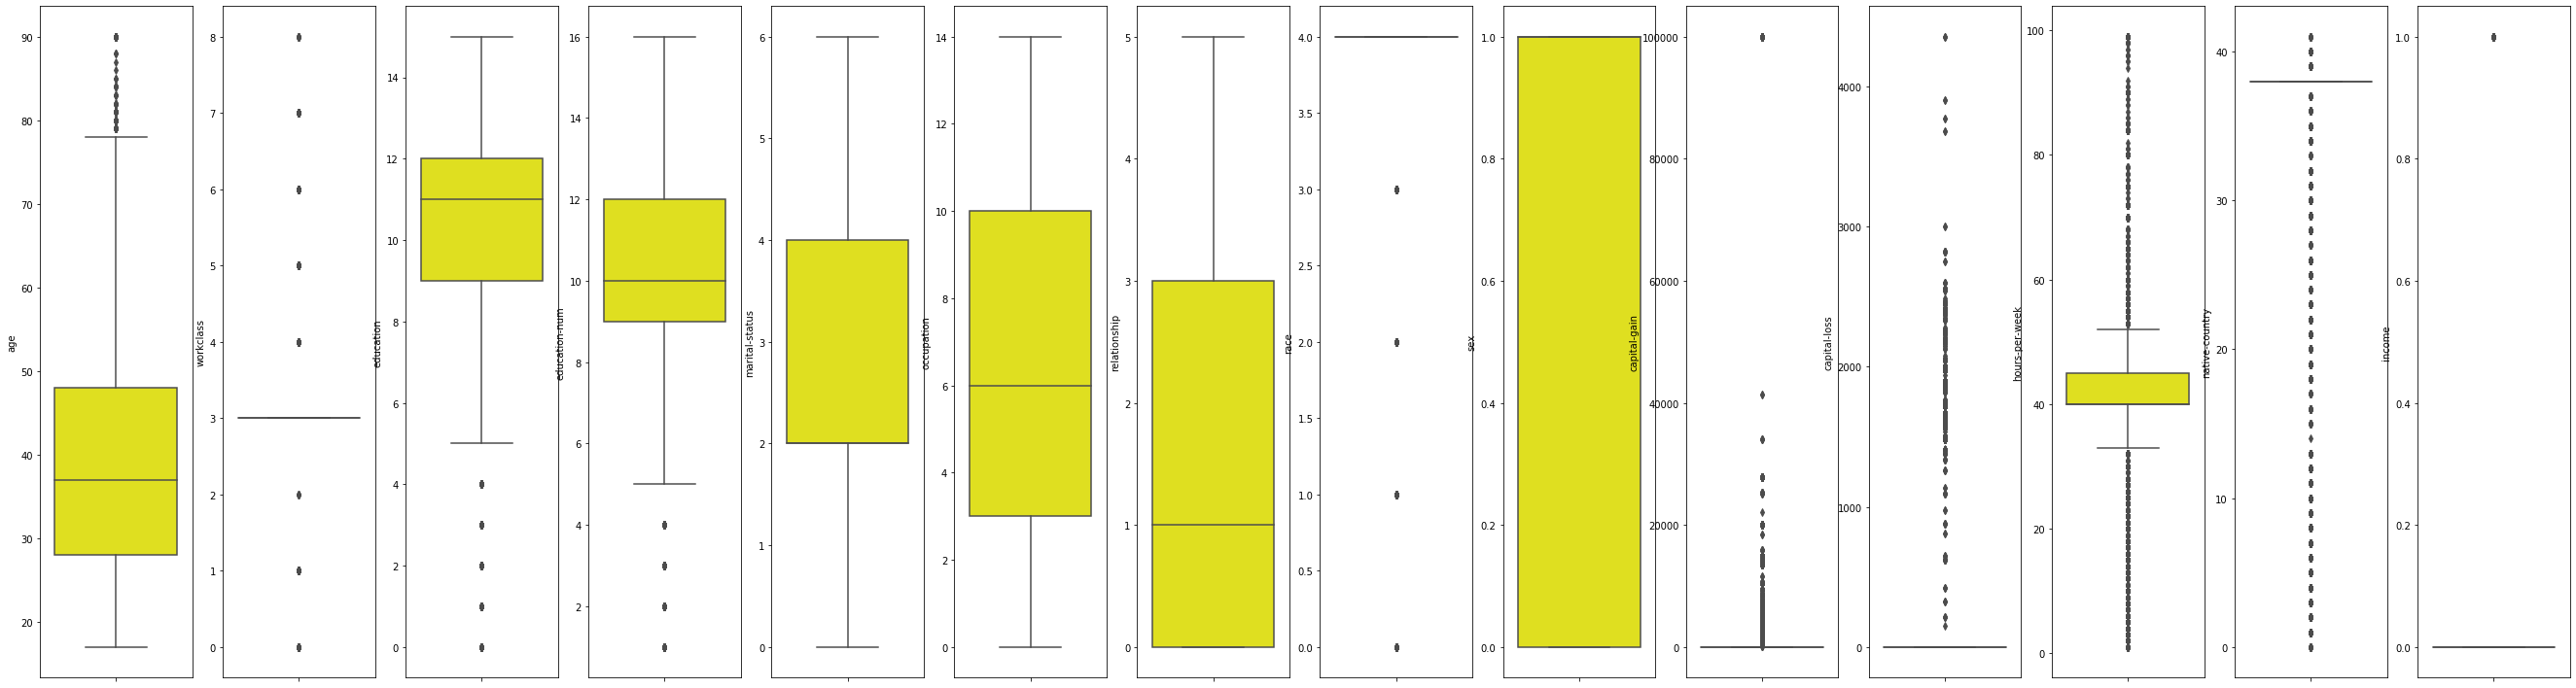

In [36]:
#using boxplot to see outliers and IQR range
collist=census_df.columns.values
ncol=15
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(census_df[collist[i]],color='yellow',orient='v')

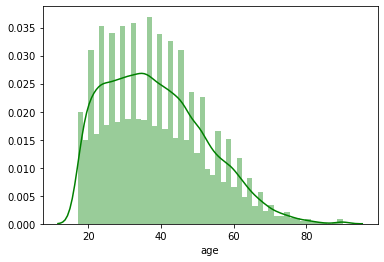

In [37]:
sns.distplot(census_df['age'],color='green')

(array([9.6000e+02, 2.0930e+03, 7.0000e+00, 2.2696e+04, 0.0000e+00,
        1.1160e+03, 2.5410e+03, 1.2980e+03, 1.8360e+03, 1.4000e+01]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

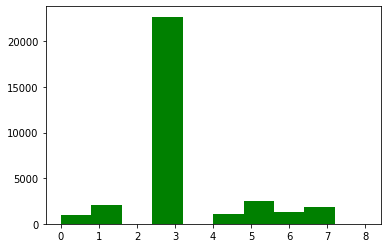

In [38]:
plt.hist(census_df['workclass'],color='green')

(array([ 2108.,   433.,   501.,   646.,  1581.,  1382.,  5768., 10501.,
         1774.,  7867.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

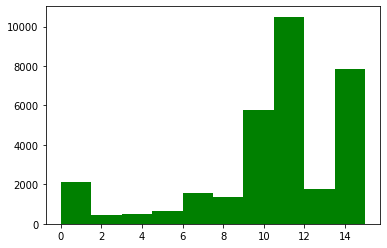

In [39]:
plt.hist(census_df['education'],color='green')

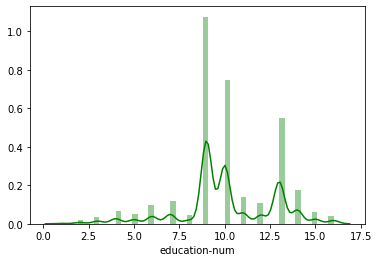

In [40]:
sns.distplot(census_df['education-num'],color='green')

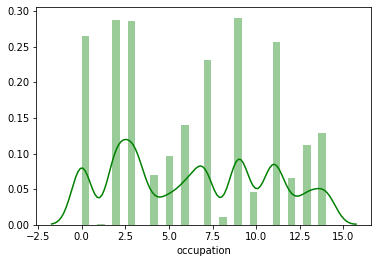

In [41]:
sns.distplot(census_df['occupation'],color='green')

(array([3.1791e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

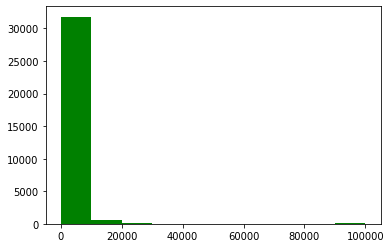

In [42]:
plt.hist(census_df['capital-gain'],color='green')

(array([3.1053e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

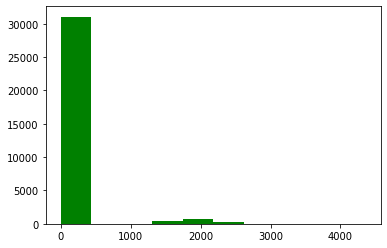

In [43]:
plt.hist(census_df['capital-loss'],color='green')

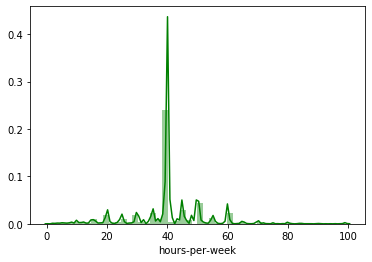

In [44]:
sns.distplot(census_df['hours-per-week'],color='green')

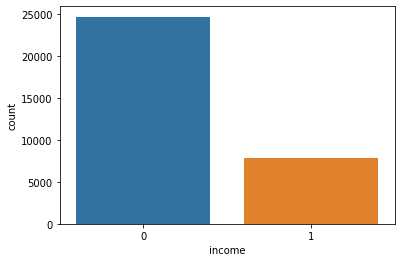

In [45]:
sns.countplot(census_df['income'])

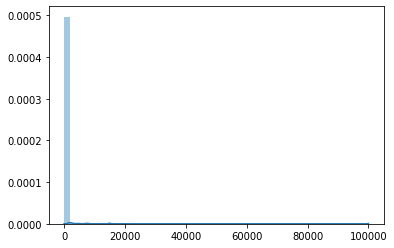

In [46]:
sns.distplot(census_df)

# Statistical Analysis

In [47]:
census_df.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.320414,10.298210,10.080679,2.611836,6.421762,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.437609,0.240810
std,13.640433,1.427659,3.870264,2.572720,1.506222,4.328619,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.063544,0.427581
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


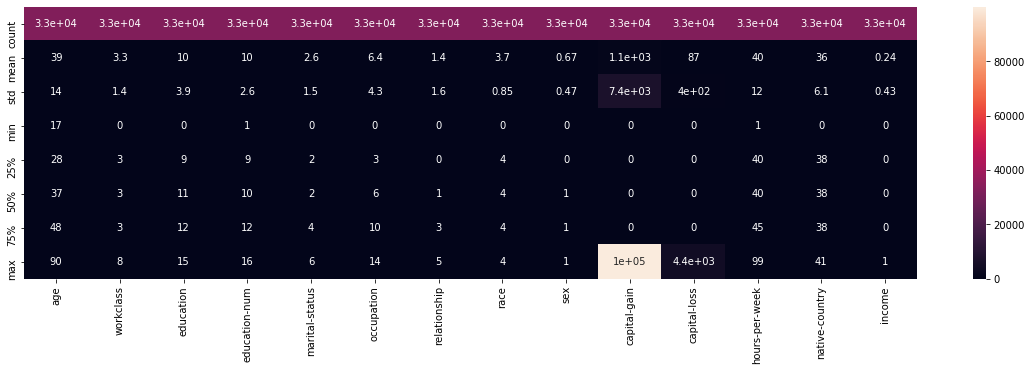

In [48]:
plt.figure(figsize=(20,5))
sns.heatmap(census_df.describe(),annot=True)

In [49]:
census_df_cor=census_df.corr()

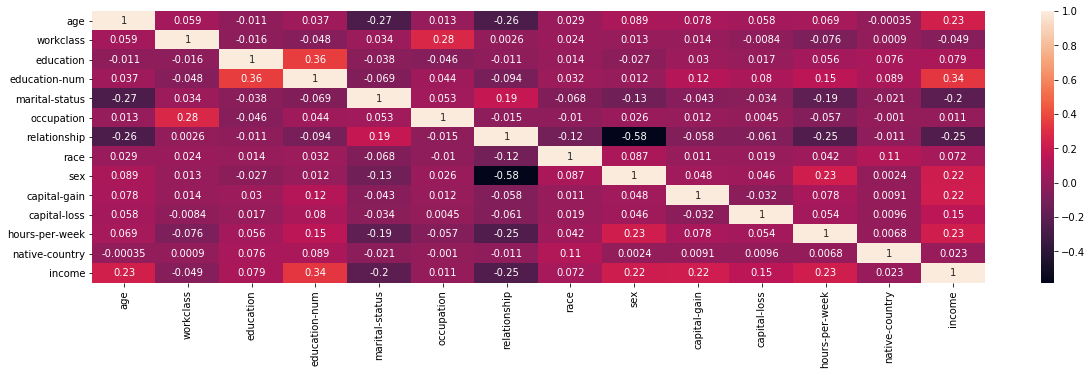

In [50]:
plt.figure(figsize=(20,5))
sns.heatmap(census_df_cor,annot=True)

In [51]:
#checking the skewness of the dataset
census_df.skew()

age                0.558743
workclass          0.719973
education         -0.934042
education-num     -0.311676
marital-status    -0.013508
occupation         0.126728
relationship       0.786818
race              -2.435386
sex               -0.719293
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
native-country    -4.236116
income             1.212430
dtype: float64

In [52]:
#the dataset is positively skewed as well as negatively skewed

# Removing outliers and skewness from the dataset

In [53]:
from scipy.stats import zscore

In [54]:
z=np.abs(zscore(census_df))
print(z)

[[0.03067056 1.87693787 0.33543693 ... 0.03542945 0.25767348 0.56319851]
 [0.83710898 1.17647971 0.33543693 ... 2.22215312 0.25767348 0.56319851]
 [0.04264203 0.22443659 0.18133163 ... 0.03542945 0.25767348 0.56319851]
 ...
 [1.42360965 0.22443659 0.18133163 ... 0.03542945 0.25767348 0.56319851]
 [1.21564337 0.22443659 0.18133163 ... 1.65522476 0.25767348 0.56319851]
 [0.98373415 0.47602156 0.18133163 ... 0.03542945 0.25767348 1.77557289]]


In [55]:
threhold=3

In [56]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([    4,    10,    11, ..., 32533, 32551, 32553], dtype=int64), array([12, 11,  7, ...,  7,  7,  7], dtype=int64))


In [57]:
z[4][12] #checking the above output result 

5.349694156433347

In [58]:
census_new=census_df[(z<3).all(axis=1)]  #removing outliers

In [59]:
print("Shape of the dataset before removing outliers",census_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",census_new.shape)

Shape of the dataset before removing outliers (32561, 14)

 

Shape of the dataset after removing the outliers (28082, 14)


In [60]:
#after removing dataset we are left with 28082 rows

In [61]:
#removing the Skewness
for i in range(0,len(collist)):
    if census_new.skew().loc[collist[i]]>0.55:
        census_new[collist[i]]=np.sqrt(census_new[collist[i]])

In [62]:
census_new.skew()

age                0.487970
workclass         -1.324367
education         -0.955208
education-num     -0.148227
marital-status    -0.047262
occupation         0.136545
relationship       0.119912
race              -2.549344
sex               -0.689990
capital-gain       3.681753
capital-loss      26.589801
hours-per-week    -0.360487
native-country    -5.311370
income             1.322676
dtype: float64

# Splitting the data into training and testing sets

In [63]:
census_new.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,2.449490,9,13,4,0,1.000000,4,1,46.626173,0.0,40,38,0.0
1,50,2.236068,9,13,2,3,0.000000,4,1,0.000000,0.0,13,38,0.0
2,38,1.732051,11,9,0,5,1.000000,4,1,0.000000,0.0,40,38,0.0
3,53,1.732051,1,7,2,5,0.000000,2,1,0.000000,0.0,40,38,0.0
5,37,1.732051,12,14,2,3,2.236068,4,0,0.000000,0.0,40,38,0.0


In [64]:
x=census_new.iloc[:,:-1]

In [65]:
x.shape

(28082, 13)

In [66]:
x.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,2.449490,9,13,4,0,1.000000,4,1,46.626173,0.0,40,38
1,50,2.236068,9,13,2,3,0.000000,4,1,0.000000,0.0,13,38
2,38,1.732051,11,9,0,5,1.000000,4,1,0.000000,0.0,40,38
3,53,1.732051,1,7,2,5,0.000000,2,1,0.000000,0.0,40,38
5,37,1.732051,12,14,2,3,2.236068,4,0,0.000000,0.0,40,38


In [67]:
y=census_new.iloc[:,-1]

In [68]:
y.shape

(28082,)

In [69]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: income, dtype: float64

In [70]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)


In [71]:
x=df_x
print(x)

[[ 0.06589052  1.50604058 -0.34347196 ... -0.03904001  0.00691081
   0.18308324]
 [ 0.88796382  1.04049216 -0.34347196 ... -0.03904001 -2.41783503
   0.18308324]
 [-0.00884342 -0.05894771  0.17219965 ... -0.03904001  0.00691081
   0.18308324]
 ...
 [ 1.48583532 -0.05894771  0.17219965 ... -0.03904001  0.00691081
   0.18308324]
 [-1.20458641 -0.05894771  0.17219965 ... -0.03904001 -1.78919722
   0.18308324]
 [ 1.0374317   0.52554433  0.17219965 ... -0.03904001  0.00691081
   0.18308324]]


In [72]:
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [73]:
# finding best random state
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
        
        
    
    
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate)



Accuracy SCORE is equal to : 0.8334995014955134 at random state 42
Accuracy SCORE is equal to : 0.8296538954564877 at random state 43
Accuracy SCORE is equal to : 0.8306509044295685 at random state 44
Accuracy SCORE is equal to : 0.8315054835493519 at random state 45
Accuracy SCORE is equal to : 0.8323600626691354 at random state 46
Accuracy SCORE is equal to : 0.8342116507619998 at random state 47
Accuracy SCORE is equal to : 0.8409058538669705 at random state 48
Accuracy SCORE is equal to : 0.8320752029625409 at random state 49
Accuracy SCORE is equal to : 0.8374875373878365 at random state 50
Accuracy SCORE is equal to : 0.8316479134026492 at random state 51
Accuracy SCORE is equal to : 0.8343540806152969 at random state 52
Accuracy SCORE is equal to : 0.8316479134026492 at random state 53
Accuracy SCORE is equal to : 0.8386269762142144 at random state 54
Accuracy SCORE is equal to : 0.8317903432559465 at random state 55
Accuracy SCORE is equal to : 0.8287993163367042 at random stat

In [74]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=83)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(21061, 13) (7021, 13) (21061,) (7021,)


# Testing the Algorithms and finding the the best parameters using Grid Search cv

In [75]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'penalty': 'l2'}

In [78]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'C': 1, 'kernel': 'rbf'}

In [77]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'n_neighbors': 10}

In [79]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.8424725822532403


CROSS_VAL_SCORE = 0.8343426425439597


ROC_AUC_SCORE = 0.7029736073582794


 
 Classification Report 
                precision    recall  f1-score   support

         0.0       0.86      0.96      0.90      5428
         1.0       0.76      0.45      0.56      1593

    accuracy                           0.84      7021
   macro avg       0.81      0.70      0.73      7021
weighted avg       0.83      0.84      0.83      7021



[[5202  226]
 [ 880  713]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, ma

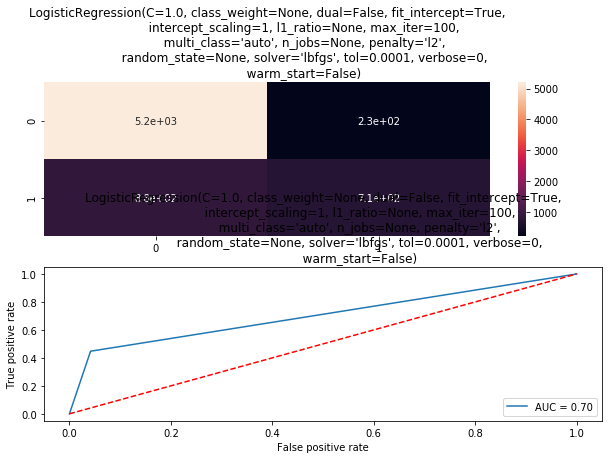

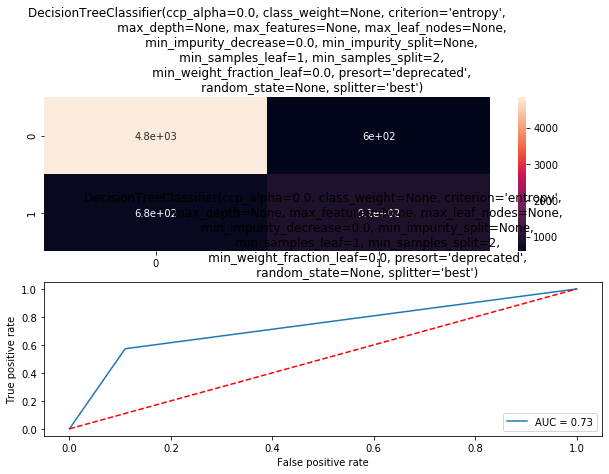

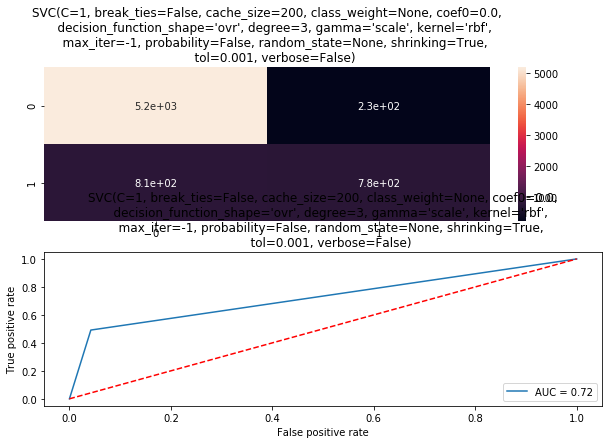

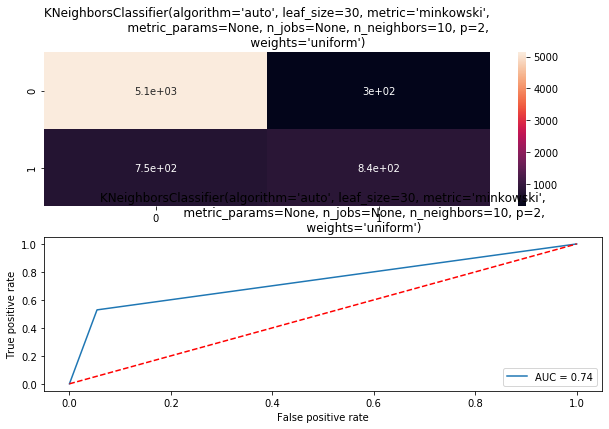

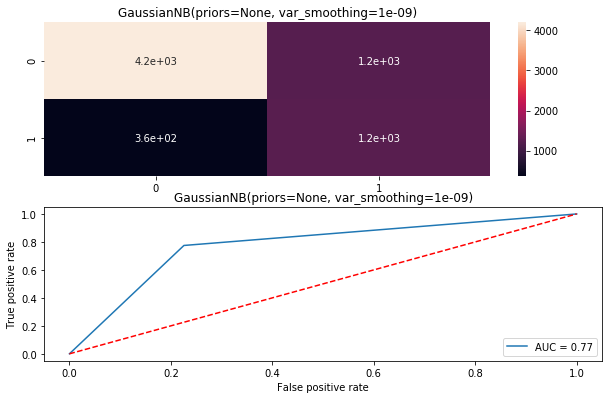

In [80]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='entropy'),SVC(C=1,kernel='rbf'),KNeighborsClassifier(n_neighbors=10),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y_test,prediction))
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(models)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          

    

In [81]:
outcome=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','GaussianNB'],'Accuracy_Score':[0.8424,0.8181,0.8520,0.8510,0.7743],'Cross_Val_Sore':[0.8343,0.8163,0.8501,0.8435,0.7708],'Roc_Auc_Score':[0.7029,0.7313,0.7246,0.7371,0.7744]})
outcome

,Model,Accuracy_Score,Cross_Val_Sore,Roc_Auc_Score
0,LogisticRegression,0.8424,0.8343,0.7029
1,DecisionTreeClassifier,0.8181,0.8163,0.7313
2,SVC,0.8520,0.8501,0.7246
3,KNeighborsClassifier,0.8510,0.8435,0.7371
4,GaussianNB,0.7743,0.7708,0.7744


In [83]:
#Hence it is observed that SVC is giving a good result, therefore finalizing it and applying Boosting techniqur to enhance the accuracy score

In [87]:
svc=SVC(C=1, kernel='rbf')
svc.fit(x_train,y_train)
prediction=svc.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.8520153824241561
The Cross Val Score = 0.8492986860198005


In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)

0.8673377332510327

In [98]:
gbcpred=gbc.predict(x_test)
acc_score=accuracy_score(gbcpred,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(gbc,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.8651189289275032
The Cross Val Score = 0.8638989679084018


In [99]:
from sklearn.externals import joblib
joblib.dump(gbc,"gbc_census.pkl")

['gbc_census.pkl']